In [1]:
import gym
from dqn_agent import DQN_Agent
from agent_handler import Agent_handler
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

crop </br>
increase contrast </br>
skip inital frames </br>

In [2]:
def describe_env(env: gym.Env):
    num_actions = env.action_space.n
    obs = env.observation_space
    num_obs = env.observation_space.shape

    print("Observation space: ", obs)
    print("Observation space size: ", num_obs)
    print("Number of actions: ", num_actions)

    return num_obs, num_actions

In [3]:
def plot(results, result_index, window_size, title):
  plt.figure(figsize=(25, 10))

  for result in results:
      sns.lineplot(np.convolve(result[result_index], np.ones(window_size) / window_size, mode='same'), label=f"(LR, EF) {(result[3]) }")
      
  plt.title(title)
  plt.legend()
  plt.show()

In [4]:

env = gym.make('MsPacman-v4', render_mode='rgb_array')

num_obs, num_actions = describe_env(env)

Observation space:  Box(0, 255, (210, 160, 3), uint8)
Observation space size:  (210, 160, 3)
Number of actions:  9


In [5]:
num_obs

(210, 160, 3)

In [6]:
vertical_crop_start   = 0       # @param{type:"integer"}
vertical_crop_end     = 171       # @param{type:"integer"}
horizontal_crop_start = 0         # @param{type:"integer"}
horizontal_crop_end   = 160       # @param{type:"integer"}

env.reset()
obs = env.render()

cropped_obs = obs[vertical_crop_start:vertical_crop_end, horizontal_crop_start:horizontal_crop_end].shape
cropped_obs

d:\Source\AI&ML\FML\CSCN8010\venv\tensorflow_cpu\lib\site-packages\gym\utils\passive_env_checker.py:289: UserWarning: WARN: No render fps was declared in the environment (env.metadata['render_fps'] is None or not defined), rendering may occur at inconsistent fps.
  logger.warn(


(171, 160, 3)

In [7]:

dqn_agent = DQN_Agent({
  "num_obs": cropped_obs,
  "num_actions": num_actions,
  "learning_rate": 0.01,
  "discount_factor": 0.9,
  "exploration_factor": 0.2,
  "update_rate": 10
})

In [8]:
handler = Agent_handler({
    "num_episodes":250,
    "max_steps":1,
    "notify_percent":5,
    "skip": 30
})

In [9]:
results = handler.train([dqn_agent], env)

~~~ Training Agent 1 1/1 ~~~
	Episode 0/250 0%
	Episode 13/250 5%
	Episode 25/250 10%
	Episode 38/250 15%
	Episode 50/250 20%
	Episode 63/250 25%
	Episode 75/250 30%
	Episode 88/250 35%
	Episode 100/250 40%
	Episode 113/250 45%
	Episode 125/250 50%
	Episode 138/250 55%
	Episode 150/250 60%
	Episode 163/250 65%
	Episode 175/250 70%
	Episode 188/250 75%
	Episode 200/250 80%
	Episode 213/250 85%
	Episode 225/250 90%
	Episode 238/250 95%
	Episode 250/250 100%

Done training!




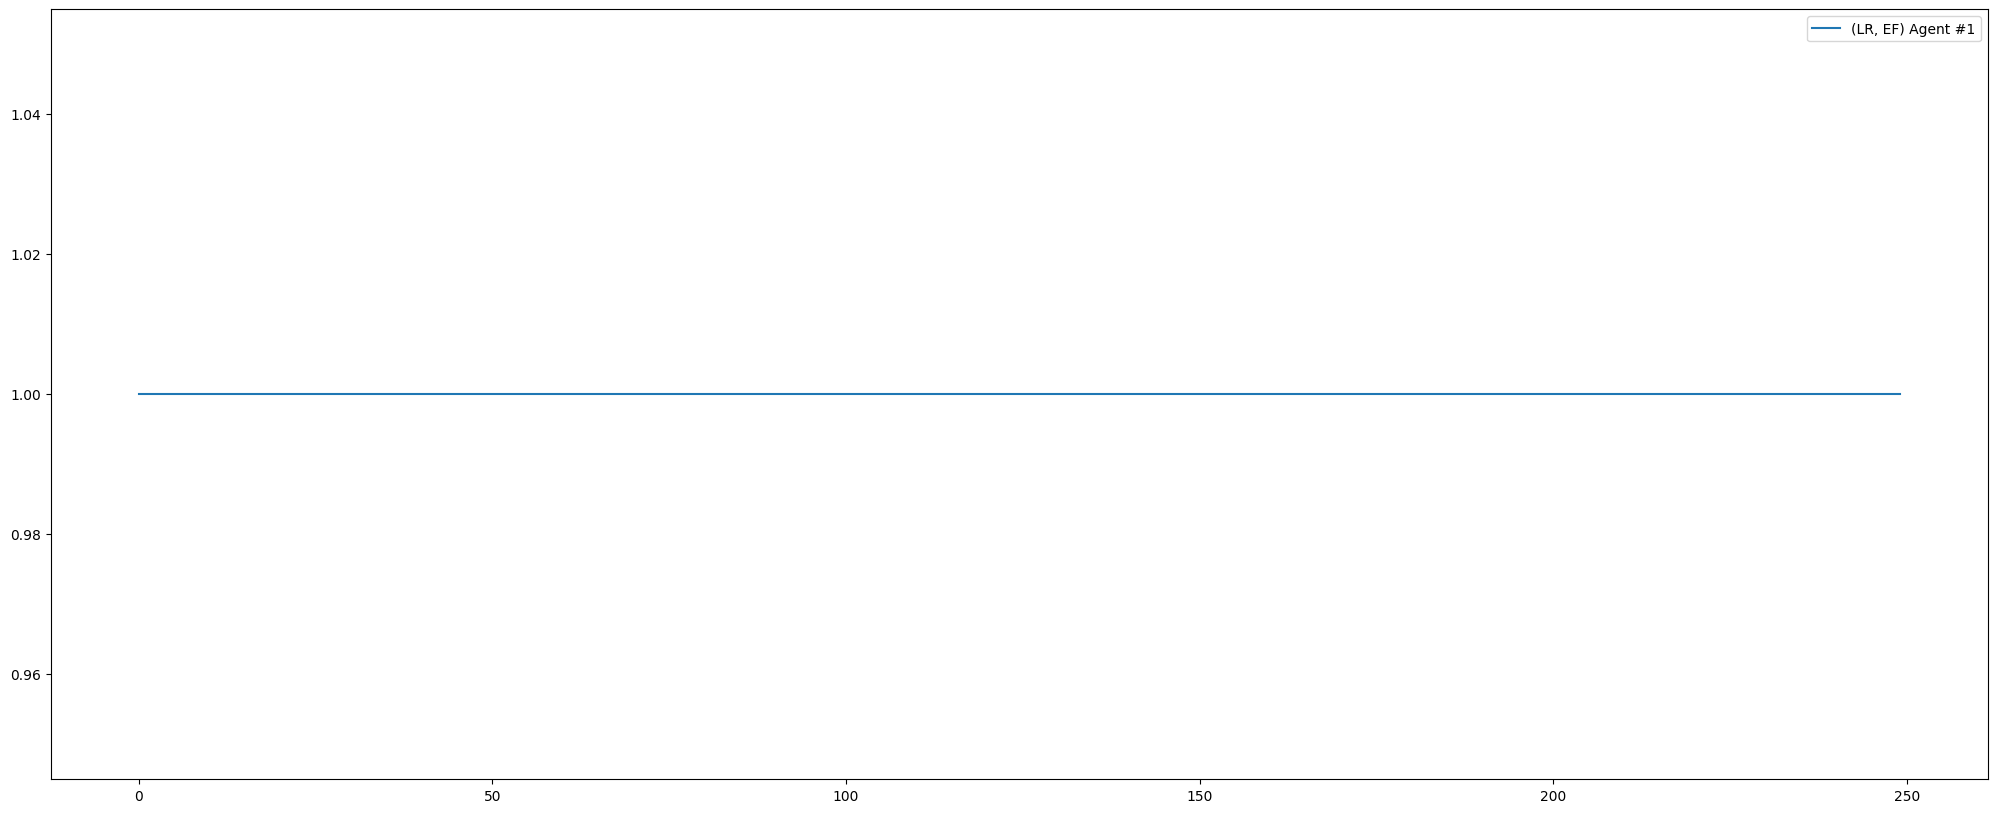

250

In [10]:
plot(results, 1, 1, '')
results[0][0]

In [11]:
env.unwrapped.get_action_meanings()

['NOOP',
 'UP',
 'RIGHT',
 'LEFT',
 'DOWN',
 'UPRIGHT',
 'UPLEFT',
 'DOWNRIGHT',
 'DOWNLEFT']

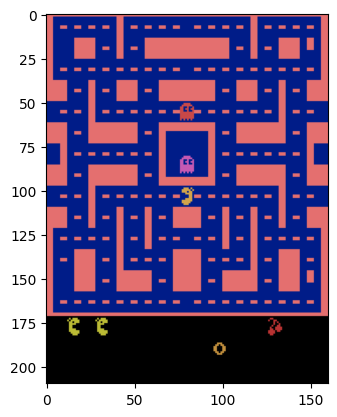

In [12]:
import matplotlib.pyplot as plt
env.reset()
obs = env.render()
plt.imshow(obs)

(171, 160, 3)

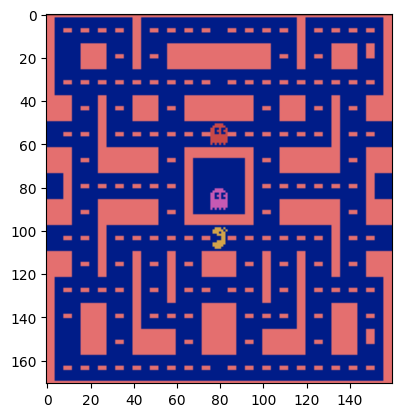

In [13]:
vertical_crop_start   = 0       # @param{type:"integer"}
vertical_crop_end     = 171       # @param{type:"integer"}
horizontal_crop_start = 0         # @param{type:"integer"}
horizontal_crop_end   = 160       # @param{type:"integer"}
cropped_obs = obs[vertical_crop_start:vertical_crop_end, horizontal_crop_start:horizontal_crop_end]
plt.imshow(cropped_obs)
cropped_obs.shape